In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [3]:
df = pd.read_csv('crimedata.csv')
# check we have imported data succesfuly
df.columns

Index(['communityName', 'state', 'countyCode', 'communityCode', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       'racePctHisp',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', length=146)

In [4]:
# adjust community names
suffixes = ['township', 'city', 'borough']

for suffix in suffixes:
    df['communityName'] = df['communityName'].str.replace(suffix, '')

In [5]:
# show strongest correlations in regards to ViolentCrimesPerPop
print(df.corr().sort_values('ViolentCrimesPerPop', ascending=False).index)

Index(['ViolentCrimesPerPop', 'assaultPerPop', 'robbbPerPop',
       'PctKidsBornNeverMar', 'burglPerPop', 'nonViolPerPop', 'murdPerPop',
       'autoTheftPerPop', 'racepctblack', 'rapesPerPop',
       ...
       'medFamInc', 'PctHousOwnOcc', 'RacialMatchCommPol', 'PctPersOwnOccup',
       'pctWInvInc', 'PctTeen2Par', 'PctYoungKids2Par', 'racePctWhite',
       'PctFam2Par', 'PctKids2Par'],
      dtype='object', length=144)


C:\Users\samla\AppData\Local\Temp\ipykernel_13800\2749285559.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr().sort_values('ViolentCrimesPerPop', ascending=False).index)


<AxesSubplot: >

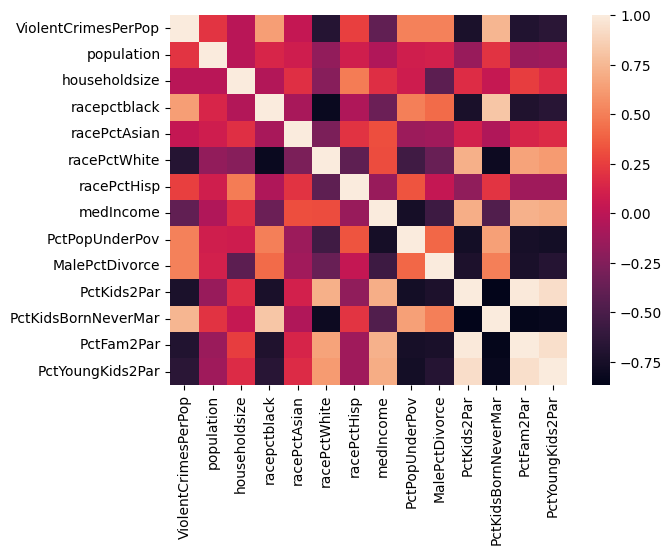

In [6]:
# plot relevant features and their correlation
sb.heatmap(df[["ViolentCrimesPerPop", "population", "householdsize", "racepctblack", "racePctAsian", "racePctWhite", "racePctHisp", "medIncome", "PctPopUnderPov", "MalePctDivorce", "PctKids2Par", "PctKidsBornNeverMar", "PctFam2Par", "PctYoungKids2Par"]].corr())

In [7]:
# features with strong correlation on which we will focus
feature_names = ["PctKids2Par", "PctKidsBornNeverMar", "PctFam2Par"]
# dropping non-existing values results in better performance than replacing nulls with the column median
updated_df = df.dropna(subset=['ViolentCrimesPerPop'])
numbered_df = updated_df.select_dtypes(include=np.number)
print(numbered_df.info())

# dropping
X = numbered_df.drop(['countyCode', 'communityCode', 'OtherPerCap', 'LemasSwornFT',
                      'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq',
                      'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
                      'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor',
                      'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg',
                      'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop', 'rapes', 'rapesPerPop', 'robberies',
                      'robbbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 
                      'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
                      'nonViolPerPop', 'murders', 'murdPerPop'], axis=1)
y = numbered_df.ViolentCrimesPerPop

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2214
Columns: 144 entries, countyCode to nonViolPerPop
dtypes: float64(116), int64(28)
memory usage: 2.2 MB
None


In [8]:
print(X.describe())
print(y.count())

         population  householdsize  racepctblack  racePctWhite  racePctAsian  \
count  1.994000e+03    1994.000000   1994.000000   1994.000000   1994.000000   
mean   5.225143e+04       2.706810      9.509694     83.489218      2.750787   
std    2.021475e+05       0.343156     14.101979     16.393607      4.648200   
min    1.000500e+04       1.600000      0.000000      2.680000      0.030000   
25%    1.435925e+04       2.490000      0.940000     75.882500      0.612500   
50%    2.268100e+04       2.650000      3.150000     89.605000      1.240000   
75%    4.315375e+04       2.850000     11.965000     95.987500      2.737500   
max    7.322564e+06       5.280000     96.670000     99.630000     57.460000   

       racePctHisp  agePct12t21  agePct12t29  agePct16t24   agePct65up  ...  \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000  ...   
mean      8.481610    14.431214    27.617357    13.985421    12.004599  ...   
std      15.208788     4.478570     6.1480

In [9]:
history = []

In [10]:
#split data into training and validation
from sklearn.model_selection import train_test_split


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [11]:
from sklearn.tree import DecisionTreeRegressor
# Define model
crime_model = DecisionTreeRegressor(random_state = 1)
# Fit model
history.append(('decision_tree', crime_model.fit(
    train_X, train_y
)))

In [12]:
from sklearn.ensemble import RandomForestRegressor

forest_crime_model = RandomForestRegressor(random_state=1)

history.append(('random_forest', forest_crime_model.fit(
    train_X, train_y
)))

In [13]:
from sklearn.ensemble import RandomForestRegressor

forest_crime_model_1 = RandomForestRegressor(random_state=1, max_depth=3, min_samples_split=50, min_samples_leaf=9)

history.append(('random_forest_optimized', forest_crime_model_1.fit(
    train_X, train_y
)))

In [14]:
from sklearn.linear_model  import LinearRegression

# Define model
lin_crime_model = LinearRegression()
# Fit model
history.append(('linear_regression', lin_crime_model.fit(
    train_X, train_y
)))

In [15]:
from sklearn import svm

regr = svm.SVR()
history.append(('SVR', regr.fit(
    train_X, train_y
)))

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, random_state=1)
history.append(('lasso', lasso.fit(
    train_X, train_y
)))

C:\Users\samla\py-env\mandatory-1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.218e+07, tolerance: 5.826e+04
  model = cd_fast.enet_coordinate_descent(


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# evaluate existing models
for model in range(len(history)):
    model_name = history[model][0]
    predictions = history[model][1].predict(val_X)
    mse = mean_squared_error(val_y, predictions)
    mae = mean_absolute_error(val_y, predictions)
    training_score = history[model][1].score(train_X, train_y)
    validation_score = history[model][1].score(val_X, val_y)
    print(model_name, ',mae: ', mae, ',mse: ', mse, ', training r2 score: ', training_score, ',validation r2 score: ',validation_score)

decision_tree ,mae:  359.4426452905812 ,mse:  348659.030993988 , training r2 score:  1.0 ,validation r2 score:  -0.020266909967570745
random_forest ,mae:  238.92769078156311 ,mse:  125660.6164488097 , training r2 score:  0.9490676053654504 ,validation r2 score:  0.6322843883224758
random_forest_optimized ,mae:  248.3838438904704 ,mse:  137143.27681876783 , training r2 score:  0.6675214731008745 ,validation r2 score:  0.5986831407641806
linear_regression ,mae:  271.6455372100731 ,mse:  280354.1088229384 , training r2 score:  0.68384745003575 ,validation r2 score:  0.1796110386412918
SVR ,mae:  389.8482698910933 ,mse:  365255.0049714758 , training r2 score:  -0.08278356614262816 ,validation r2 score:  -0.06883104163409204
lasso ,mae:  272.1538302457891 ,mse:  283504.3161980376 , training r2 score:  0.6836974623945244 ,validation r2 score:  0.17039271340478024


In [18]:
# Set random seed
tf.random.set_seed(1)

dnn_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
dnn_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), 
                          metrics=['mse'])

# Fit the model and save the history (we can plot this)
dnn_history =dnn_model.fit(
    train_X, train_y, epochs=100, verbose=0
)
dnn_model.evaluate(val_X, val_y)

16/16 [==============================] - 0s 1ms/step - loss: 317.4659 - mse: 275809.5625


[317.46588134765625, 275809.5625]

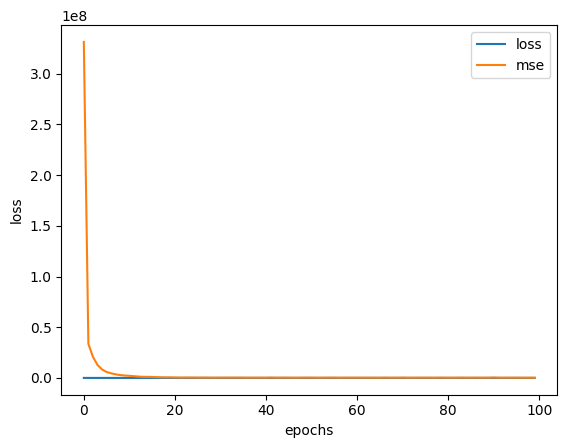

In [19]:
pd.DataFrame(dnn_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");


In [20]:
dnn_optimized_model = tf.keras.Sequential([
  tf.keras.layers.Dense(40), 
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
dnn_optimized_model.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(), 
                          metrics=['mse'])

# Fit the model and save the history (we can plot this)
dnn_optimized_history =dnn_optimized_model.fit(
    train_X, train_y, epochs=400, verbose=0
)
dnn_optimized_model.evaluate(val_X, val_y)

16/16 [==============================] - 0s 1ms/step - loss: 1058707.8750 - mse: 1058707.8750


[1058707.875, 1058707.875]

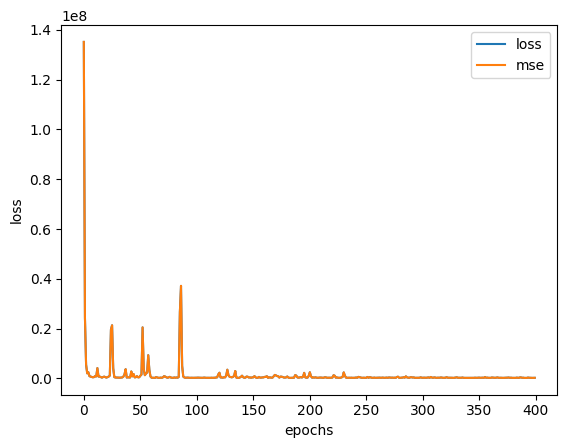

In [21]:
pd.DataFrame(dnn_optimized_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");